<a href="https://colab.research.google.com/github/sksuman97/TAXI-MOBILITY-SURGE-PRICE-PREDICTION/blob/main/ML_Projects_I_TAXI_MOBILITY_SURGE_PRICE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAXI MOBILITY SURGE PRICE PREDICTION

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download
their app on smartphones and book a cab from anywhere in the cities they operate in. They, in
turn, search for cabs from various service providers and provide the best option to their clients
across available options. They have been in operation for a little less than a year now. During this
period, they have captured surge pricing types from the service providers.
The main objective is to build a predictive model, which could help them in predicting the surge
pricing type proactively. This would in turn help them in matching the right cabs with the right
customers quickly and efficiently.

</br>

● Trip_ID: ID for TRIP

● Trip_Distance: The distance for the trip requested by the customer

● TypeofCab: Category of the cab requested by the customer

● CustomerSinceMonths: Customer using cab services since n months; 0 month means
the current month

● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

● Customer_Rating: Average of lifetime ratings of the customer till date

● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for

modelling purposes

● Gender: Gender of the customer

● SurgePricingType: Target (can be of 3 types) - DV

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/TAXI MOBILITY SURGE PRICE PREDICTION/Taxi Mobility Surge Price Prediction-20210510T143336Z-001/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv")

In [4]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [13]:
df.duplicated().sum()

0

In [15]:
df.drop(columns=['Trip_ID'],inplace=True)

## Drop Var1 

In [22]:
df.drop(columns=['Var1'],inplace=True)

In [23]:
df['Life_Style_Index'].value_counts()

2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

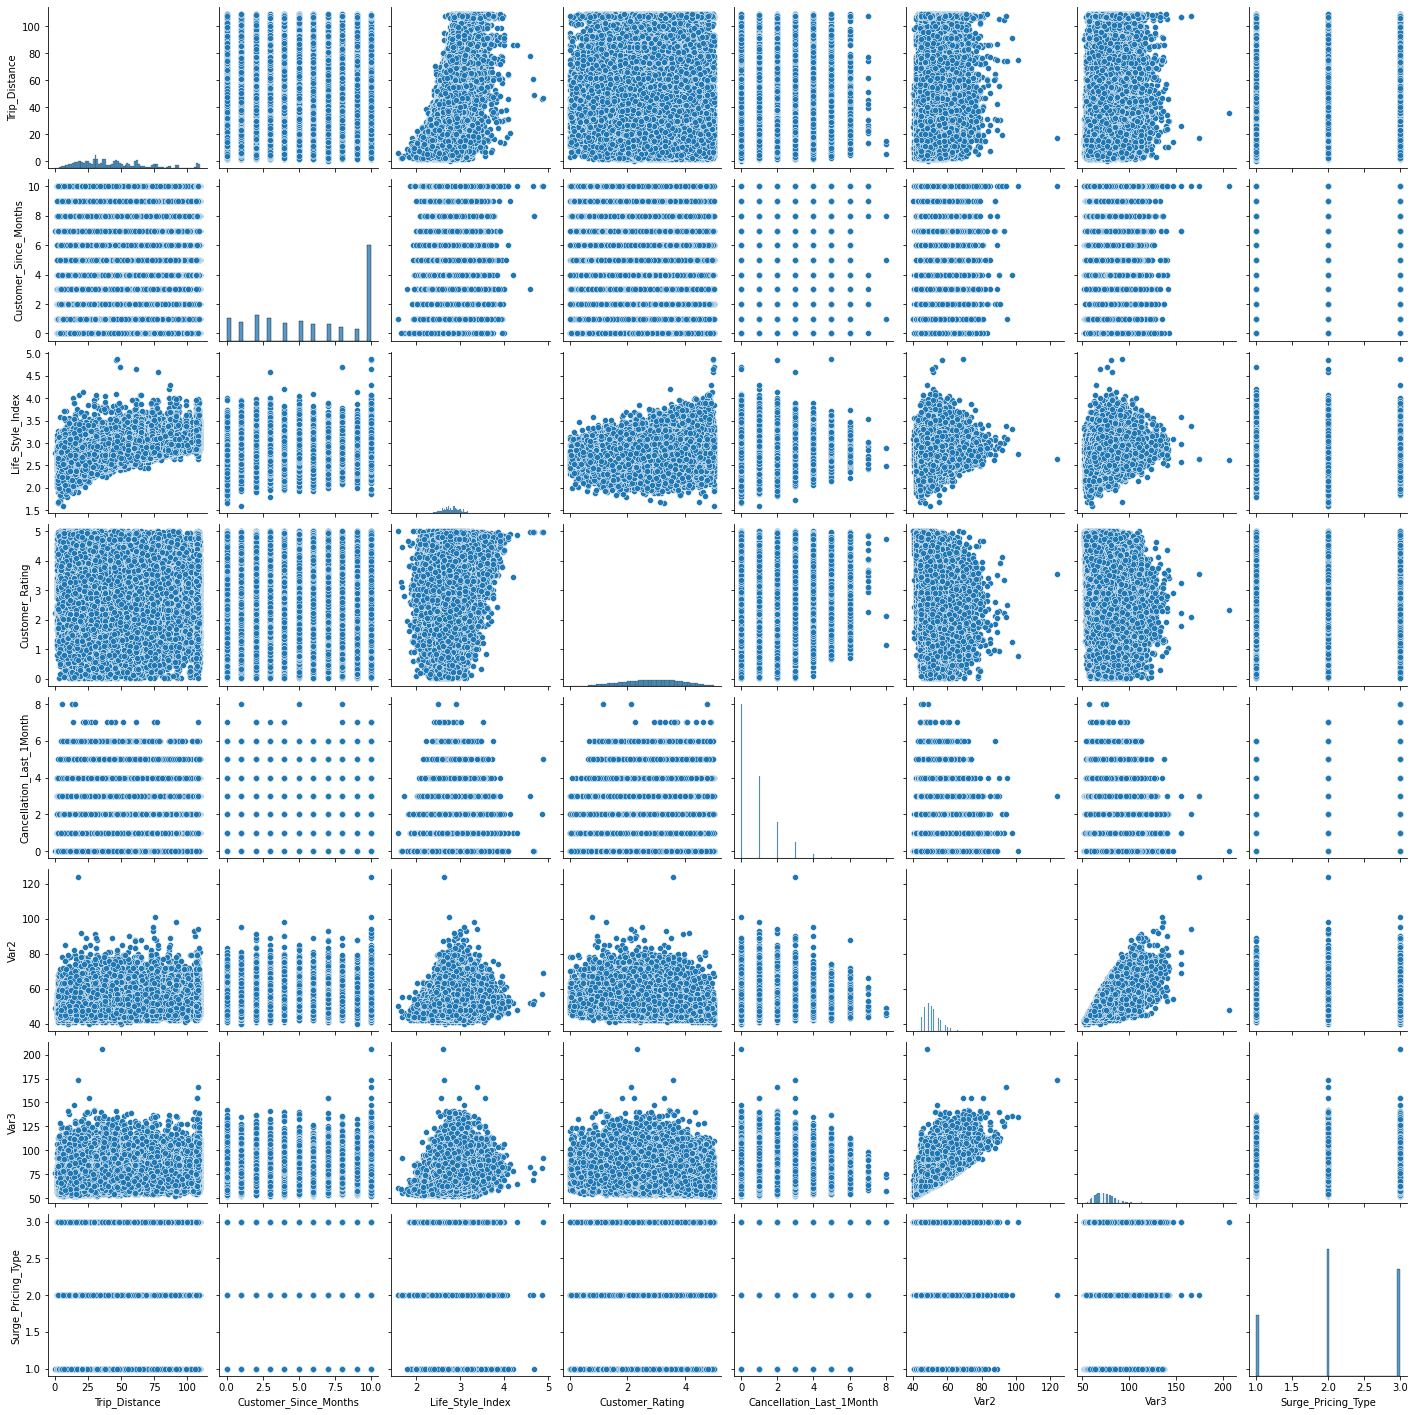

In [27]:
sns.pairplot(df)

In [24]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

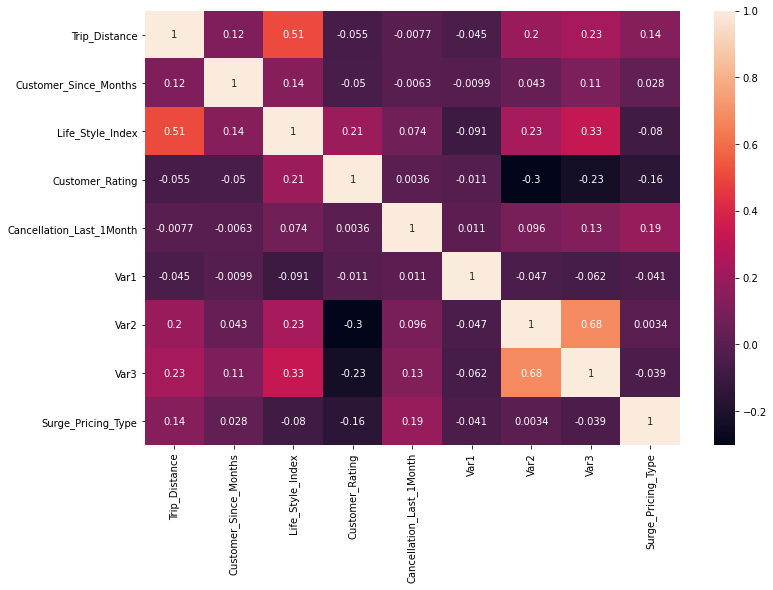

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [21]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Surge_Pricing_Type']]])

MissingDataError: ignored

In [ ]:
!pip install pywedge

In [8]:
import pywedge as pw

In [10]:
mc = pw.Pywedge_Charts(df, c=None, y = 'Surge_Pricing_Type')

In [11]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')